<a href="https://colab.research.google.com/github/gabrielfraga17/IA-Generativa/blob/main/AKCIT_GenAI_M11_Colab_Unidade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

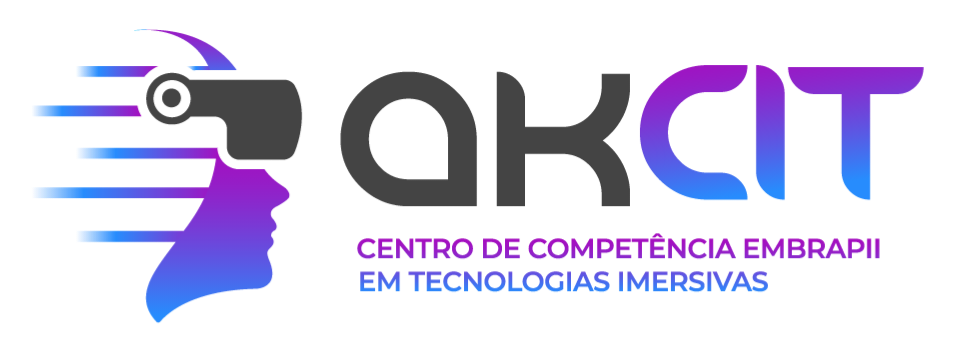


# Identificação

**Microcurso:** Arquiteturas Neurais Avançadas para IA Generativa para Áudio e Voz

**Docente:** Prof. Dr. Frederico Santos de Oliveira

# Check-list para escrita do Notebook Colab

[ ] Objetivos (definir os objetivos de aprendizagem, destacando o que os estudantes devem aprender ou realizar ao final).

[ ] Estruturação (organizar o Colab de forma lógica e sequencial, seguindo a estrutura dos tópicos da ementa do Microcurso).

[ ] Introdução (fornecer uma introdução detalhada ao tópico, explicando sua importância e relevância para a análise de dados).

[ ] Explicação teórica (incluir explicações teóricas sobre os conceitos abordados, utilizando linguagem acessível aos estudantes).

[ ] Exemplos práticos (apresentar exemplos práticos de implementação dos conceitos discutidos, utilizando código-fonte e visualizações sempre que possível).

[ ] Exercícios e desafios (inserir exercícios e desafios ao longo do Colab para que os estudantes possam aplicar e reforçar o que aprenderam).

[ ] Recursos visuais (incluir imagens, gráficos e outros recursos visuais para ilustrar conceitos complexos e facilitar a compreensão dos estudantes).

[ ] Referências bibliográficas (citar referências bibliográficas importantes para que os estudantes possam aprofundar o seu conhecimento sobre o tópico).


# **Tutorial de Clonagem de Voz com o Modelo XTTS**

## Introdução
Este tutorial apresenta um guia detalhado para a utilização do modelo XTTS da Coqui AI, focado na clonagem de voz a partir de uma amostra de áudio. Ao seguir os passos descritos, você aprenderá a configurar o ambiente, utilizar o modelo para síntese de voz e aplicar o conhecimento em um projeto prático.

**Objetivos de Aprendizagem**:

- **Configuração do Ambiente**: Preparar o ambiente de desenvolvimento no Google Colab, incluindo a instalação das bibliotecas necessárias.

- **Download e Carregamento do Modelo**: Obter e carregar o modelo XTTS pré-treinado para a síntese de voz em português.

- **Extração de Características Vocais**: Utilizar uma amostra de áudio de referência para extrair as características únicas de uma voz.

- **Síntese de Voz**: Gerar novas falas a partir de texto, utilizando a voz previamente clonada.

- **Projeto de Aplicação**: Desenvolver um audiobook, unificando múltiplos trechos de áudio sintetizado e adicionando uma trilha sonora.


## Passo 1: Clonagem do Repositório Coqui TTS

O primeiro passo consiste em obter o código-fonte do projeto. O comando git clone realiza o download de uma cópia local do repositório oficial do Coqui TTS, hospedado no GitHub, para o ambiente de execução do Colab. Este repositório contém todos os scripts e arquivos necessários para a utilização do modelo.






In [ ]:
!git clone https://github.com/idiap/coqui-ai-TTS

Cloning into 'coqui-ai-TTS'...
remote: Enumerating objects: 33807, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 33807 (delta 77), reused 42 (delta 42), pack-reused 33675 (from 3)
Receiving objects: 100% (33807/33807), 137.86 MiB | 3.77 MiB/s, done.
Resolving deltas: 100% (24370/24370), done.


## Passo 2: Definição do Diretório de Trabalho

Após a clonagem do repositório, é necessário definir o diretório do projeto como o local de trabalho atual. O comando os.chdir (Change Directory) altera o foco do sistema de arquivos para a pasta coqui-ai-TTS, garantindo que os comandos subsequentes sejam executados no contexto correto.

In [ ]:
import os

os.chdir("/content/coqui-ai-TTS")

## Passo 3: Instalação das Dependências

Para o correto funcionamento do modelo, é preciso instalar um conjunto de bibliotecas e pacotes de software dos quais ele depende. O gerenciador de pacotes pip é utilizado para instalar as bibliotecas do projeto, bem como torch e torchaudio para operações de machine learning e áudio.



In [ ]:
!pip install torch torchaudio
!pip install -e .
!pip install --upgrade datasets
!pip install torchcodec
!pip install soundfile

Obtaining file:///content/coqui-ai-TTS
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for coqui-tts (pyproject.toml) ... done
  Created wheel for coqui-tts: filename=coqui_tts-0.27.2-py3-none-any.whl size=12951 sha256=b089aaee6bcf02fe496cb38e3b25766f53a41e0b580750cf4c357097f1e0c946
  Stored in directory: /tmp/pip-ephem-wheel-cache-jz_1e5nl/wheels/42/68/0f/8ab4c51f62b46376e896d128de1d064635c369e8efeafd9f52
Successfully built coqui-tts
  Attempting uninstall: coqui-tts
    Found existing installation: coqui-tts 0.27.2
    Uninstalling coqui-tts-0.27.2:
      Successfully uninstalled coqui-tts-0.27.2


## Passo 4: Importação das Bibliotecas

Com as dependências instaladas, o próximo passo é importá-las para o script Python. A instrução import carrega as funcionalidades das bibliotecas na memória, tornando-as acessíveis para uso no código, como as classes XttsConfig e Xtts, que são essenciais para interagir com o modelo.

In [ ]:
import argparse
import os
import sys
TTS_PATH = "TTS/"
sys.path.append(TTS_PATH) # set this if TTS is not installed globally

from tqdm import tqdm
import torch
import torchaudio
from TTS.utils.synthesizer import Synthesizer

USE_CUDA = torch.cuda.is_available()
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


from TTS.tts.configs.xtts_config import XttsConfig
from TTS.tts.models.xtts import Xtts

## Passo 5: Download dos Checkpoints do Modelo XTTS

Nesta etapa, realizaremos o download do modelo pré-treinado. Este modelo consiste em arquivos de checkpoints, que contêm os pesos e parâmetros resultantes de um treinamento extensivo com milhares de horas de áudio. O script a seguir baixa esses arquivos do Hugging Face Hub para um diretório local.

In [ ]:
import os
from huggingface_hub import snapshot_download

# --- Configuração ---
# ID do repositório no Hugging Face
repo_id = "freds0/XTTS-CML-TTS-ptbr"

# Nome da pasta local onde os arquivos serão salvos
# O script criará esta pasta se ela não existir.
local_dir = "./XTTS-CML-TTS-ptbr-checkpoints"

# --- Início do Script ---
print(f"Iniciando o download do repositório: {repo_id}")
print(f"Os arquivos serão salvos em: {os.path.abspath(local_dir)}")

try:
    # Baixa todos os arquivos do repositório
    # local_dir_use_symlinks=False garante que os arquivos sejam copiados
    # diretamente em vez de usar links simbólicos (melhor para portabilidade).
    snapshot_download(
        repo_id=repo_id,
        local_dir=local_dir,
        local_dir_use_symlinks=False,
        # Você pode descomentar a linha abaixo se o repositório for privado
        # token="seu_token_aqui"
    )
    print("\n✅ Download concluído com sucesso!")
    print(f"Os checkpoints e outros arquivos do modelo estão na pasta '{local_dir}'.")

except Exception as e:
    print(f"\n❌ Ocorreu um erro durante o download: {e}")

Iniciando o download do repositório: freds0/XTTS-CML-TTS-ptbr
Os arquivos serão salvos em: /content/coqui-ai-TTS/XTTS-CML-TTS-ptbr-checkpoints


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:982: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

dvae.pth:   0%|          | 0.00/211M [00:00<?, ?B/s]

train_xtts_pt.py: 0.00B [00:00, ?B/s]

mel_stats.pth:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

model.pth:   0%|          | 0.00/5.61G [00:00<?, ?B/s]


✅ Download concluído com sucesso!
Os checkpoints e outros arquivos do modelo estão na pasta './XTTS-CML-TTS-ptbr-checkpoints'.


## Passo 6: Seleção de uma Amostra de Áudio Aleatória


Para realizar a clonagem, o modelo necessita de um arquivo de áudio que servirá como referência vocal. Em vez de fazer o upload de um arquivo manualmente, o código a seguir selecionará programaticamente uma amostra de áudio aleatória do dataset [BRSpeech-TTS](https://huggingface.co/datasets/freds0/BRSpeech-TTS).

Este método automatiza a obtenção de uma amostra de referência. O script carrega o dataset em modo streaming, embaralha seu conteúdo e seleciona o primeiro item. O áudio é reproduzido para verificação e salvo localmente para ser utilizado na próxima etapa.

In [ ]:
from IPython.display import Audio, display
from datasets import load_dataset
import soundfile as sf
import os
import random # <-- Importa a biblioteca para gerar números aleatórios

# --- Configuração ---
# Alterado para o repositório correto
repo_id = "freds0/BRSpeech-TTS"
pasta_saida = "amostras_dataset_brspeech"

print("Carregando o dataset em MODO STREAMING...")

try:
    # Adiciona .shuffle() para carregar os dados em ordem aleatória
    # Usamos um 'seed' (semente) aleatório para garantir uma nova amostra a cada execução
    semente_aleatoria = random.randint(0, 10000)
    streaming_dataset = load_dataset(repo_id, streaming=True, split='train', trust_remote_code=True).shuffle(
        seed=semente_aleatoria
    )

    print(f"\n✅ Dataset pronto. Pegando uma amostra aleatória (semente: {semente_aleatoria})...")

    iterator = iter(streaming_dataset)
    amostra_aleatoria = next(iterator)

    # --- Acessa o áudio já decodificado ---
    dados_de_audio = amostra_aleatoria['audio']
    audio_array = dados_de_audio['array']
    taxa_amostragem = dados_de_audio['sampling_rate']

    # --- Toca o áudio ---
    print("\n▶️  Tocando a amostra de áudio:")
    display(Audio(data=audio_array, rate=taxa_amostragem))

    # --- Salva a amostra em arquivo .wav ---
    os.makedirs(pasta_saida, exist_ok=True)
    caminho_arquivo = os.path.join(pasta_saida, "amostra_aleatoria.wav")
    sf.write(caminho_arquivo, audio_array, taxa_amostragem)

    print(f"\n💾 Amostra salva em: {os.path.abspath(caminho_arquivo)}")

except Exception as e:
    print(f"\n❌ Ocorreu um erro: {e}")


`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'freds0/BRSpeech-TTS' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
ERROR:datasets.load:`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'freds0/BRSpeech-TTS' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.


Carregando o dataset em MODO STREAMING...


Resolving data files:   0%|          | 0/53 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/53 [00:00<?, ?it/s]


✅ Dataset pronto. Pegando uma amostra aleatória (semente: 557)...

▶️  Tocando a amostra de áudio:



💾 Amostra salva em: /content/coqui-ai-TTS/amostras_dataset_brspeech/amostra_aleatoria.wav


## Passo 7: Configuração e Carregamento do Modelo

O código a seguir configura os caminhos para os arquivos do modelo e inicializa o objeto Xtts. Em seguida, o modelo é carregado na memória. A instrução model.cuda() transfere o modelo para a GPU, o que resulta em uma aceleração significativa no tempo de processamento para a síntese de áudio.



In [ ]:
checkpoint_path = "/content/coqui-ai-TTS/XTTS-CML-TTS-ptbr-checkpoints"
config_path = "/content/coqui-ai-TTS/XTTS-CML-TTS-ptbr-checkpoints/config.json"
sr = 22050
lang = 'pt'


In [ ]:
config = XttsConfig()
config.load_json(config_path)
model = Xtts.init_from_config(config)
model.load_checkpoint(config, checkpoint_dir=checkpoint_path, eval=True)
model.cuda()

Xtts(
  (gpt): GPT(
    (conditioning_encoder): ConditioningEncoder(
      (init): Conv1d(80, 1024, kernel_size=(1,), stride=(1,))
      (attn): Sequential(
        (0): AttentionBlock(
          (norm): GroupNorm32(32, 1024, eps=1e-05, affine=True)
          (qkv): Conv1d(1024, 3072, kernel_size=(1,), stride=(1,))
          (attention): QKVAttentionLegacy()
          (proj_out): Conv1d(1024, 1024, kernel_size=(1,), stride=(1,))
        )
        (1): AttentionBlock(
          (norm): GroupNorm32(32, 1024, eps=1e-05, affine=True)
          (qkv): Conv1d(1024, 3072, kernel_size=(1,), stride=(1,))
          (attention): QKVAttentionLegacy()
          (proj_out): Conv1d(1024, 1024, kernel_size=(1,), stride=(1,))
        )
        (2): AttentionBlock(
          (norm): GroupNorm32(32, 1024, eps=1e-05, affine=True)
          (qkv): Conv1d(1024, 3072, kernel_size=(1,), stride=(1,))
          (attention): QKVAttentionLegacy()
          (proj_out): Conv1d(1024, 1024, kernel_size=(1,), stride=(

In [ ]:
ker

## Passo 8: Extração das Características Vocais (Speaker Embeddings)

Nesta etapa, o modelo processa o áudio de referência para extrair as características distintivas da voz. O resultado é uma representação vetorial, tecnicamente denominada "speaker embedding" ou "speaker latents".

Este vetor encapsula as propriedades matemáticas da voz, como timbre, tom e prosódia. Uma vez computado, ele pode ser utilizado para instruir o modelo a sintetizar qualquer novo texto com as mesmas características vocais da amostra original.

Atenção: A execução deste código depende da variável caminho_arquivo, definida no Passo 6.

In [ ]:
print("Computing speaker latents...")
spk_reference = caminho_arquivo
gpt_cond_latent, speaker_embedding = model.get_conditioning_latents(audio_path=[spk_reference], gpt_cond_len=30, gpt_cond_chunk_len=4, max_ref_length=60)


Computing speaker latents...


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

## Passo 9: Geração de Áudio a partir de Texto

Com o speaker embedding gerado, o modelo está pronto para sintetizar áudio. O código abaixo define uma lista de sentenças e itera sobre ela, utilizando a função model.inference() para gerar o áudio correspondente a cada texto com a voz clonada. O áudio resultante é exibido para reprodução imediata.

In [ ]:
sentences = [
  "Capítulo Um do Livro: Memórias Póstumas de Brás Cubas.",
  "Algum tempo hesitei se devia abrir estas memórias pelo princípio ou pelo fim,",
  "isto é, se poria em primeiro lugar o meu nascimento ou a minha morte.",
  "Suposto o uso vulgar seja começar pelo nascimento, duas considerações me levaram a adotar diferente método:",
  "a primeira é que eu não sou propriamente um autor defunto, mas um defunto autor, para quem a campa foi outro berço;",
  "a segunda é que o escrito ficaria assim mais galante e mais novo.",
  "Moisés, que também contou a sua morte, não a pôs no intróito, mas no cabo:",
  "diferença radical entre este livro e o Pentateuco."
]

In [ ]:
from IPython.display import Audio, display
for index, sentence in enumerate(tqdm(sentences)):
    if index > 9:
        break
    wav = model.inference(
        sentence,
        lang,
        gpt_cond_latent,
        speaker_embedding,
        repetition_penalty=10.0,
        temperature=0.01,
        speed=1.0
    )

    display(Audio(data=wav["wav"], rate=24000))

  0%|          | 0/8 [00:00<?, ?it/s]

 12%|█▎        | 1/8 [00:02<00:19,  2.74s/it]

 25%|██▌       | 2/8 [00:05<00:15,  2.66s/it]

 38%|███▊      | 3/8 [00:07<00:12,  2.53s/it]

 50%|█████     | 4/8 [00:11<00:12,  3.07s/it]

 62%|██████▎   | 5/8 [00:14<00:09,  3.16s/it]

 75%|███████▌  | 6/8 [00:17<00:05,  2.81s/it]

 88%|████████▊ | 7/8 [00:19<00:02,  2.64s/it]

100%|██████████| 8/8 [00:22<00:00,  2.78s/it]


# **Exercício de Aplicação: Criação de um Audiobook**

Este exercício tem como objetivo consolidar o aprendizado através da criação de um produto final: um audiobook curto com narração e trilha sonora.

O desafio consiste em:

- Definir um texto e segmentá-lo em frases.

- Gerar a narração para cada frase com a voz clonada.

- Concatenar os arquivos de áudio da narração.

- Adicionar uma música de fundo para a produção final.


## Etapa 1: Preparação do Texto

Defina o conteúdo do audiobook. Edite a lista texto_audiobook com seu texto, segmentando-o em sentenças para uma narração mais fluida.

In [ ]:
texto_audiobook = [
    "Era uma vez, em uma terra muito distante, um reino mágico onde as árvores sussurravam segredos ao vento.",
    "Neste reino, vivia uma jovem corajosa chamada Elara, que sonhava em explorar as montanhas proibidas.",
    "Um dia, ela decidiu partir em sua jornada, levando apenas um mapa antigo e seu fiel companheiro, um pequeno dragão de fogo."
]

## Etapa 2: Fazer Upload da Amostra de Voz

**Amostra de Áudio**: Grave um áudio de 10 a 30 segundos de você lendo um texto qualquer com clareza. Salve-o como um arquivo .wav. Faca o upload deste arquivo para o Colab.

O codigo a seguir permite que você envie um arquivo de áudio (em formato .wav ou .flac) que será usado como referência para a clonagem de voz.

In [ ]:
from google.colab import files
import os

# Executa o comando para abrir a janela de upload
print("Por favor, selecione o arquivo para enviar:")
uploaded = files.upload()

# Verifica se algum arquivo foi enviado e mostra os nomes e tamanhos
if not uploaded:
  print("\nNenhum arquivo foi enviado.")
else:
  for filename, content in uploaded.items():
    # O arquivo já está salvo no ambiente do Colab com o nome original
    file_size = os.path.getsize(filename)
    print(f'\n✅ Arquivo "{filename}" enviado com sucesso! ({file_size} bytes)')


reference_audio = filename
# Você pode listar os arquivos no diretório atual para confirmar
print("\nArquivos no diretório atual:")
!ls -lh

Por favor, selecione o arquivo para enviar:


Saving banking_service_20250116095105478326.wav to banking_service_20250116095105478326.wav

✅ Arquivo "banking_service_20250116095105478326.wav" enviado com sucesso! (177486 bytes)

Arquivos no diretório atual:
total 296K
drwxr-xr-x  2 root root 4.0K Oct 14 22:36 amostras_dataset_brspeech
drwxr-xr-x  2 root root 4.0K Oct 14 22:32 amostras_dataset_brspeech_leni
-rw-r--r--  1 root root 174K Oct 14 23:02 banking_service_20250116095105478326.wav
-rw-r--r--  1 root root  613 Oct 14 22:21 CITATION.cff
-rw-r--r--  1 root root 5.4K Oct 14 22:21 CODE_OF_CONDUCT.md
-rw-r--r--  1 root root 6.2K Oct 14 22:21 CONTRIBUTING.md
-rw-r--r--  1 root root  720 Oct 14 22:21 Dockerfile
drwxr-xr-x  2 root root 4.0K Oct 14 22:21 dockerfiles
drwxr-xr-x  3 root root 4.0K Oct 14 22:21 docs
-rw-r--r--  1 root root 1.8K Oct 14 22:21 hubconf.py
drwxr-xr-x  2 root root 4.0K Oct 14 22:21 images
-rw-r--r--  1 root root  17K Oct 14 22:21 LICENSE.txt
-rw-r--r--  1 root root 1.8K Oct 14 22:21 Makefile
drwxr-xr-x  3 root

## Etapa 3: Extração das Características Vocais (Speaker Embeddings)

Vamos extrair as características distintivas da voz que foi enviada. O resultado é uma representação vetorial, tecnicamente denominada "speaker embedding" ou "speaker latents".


In [ ]:
print("Computing speaker latents...")
spk_reference = reference_audio
gpt_cond_latent, speaker_embedding = model.get_conditioning_latents(audio_path=[spk_reference], gpt_cond_len=30, gpt_cond_chunk_len=4, max_ref_length=60)


Computing speaker latents...


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

## Etapa 4: Geração e Armazenamento dos Arquivos de Áudio

O script a seguir irá gerar a narração para cada sentença e salvar cada trecho como um arquivo .wav individual em um diretório chamado audiobook_trechos. Esta abordagem modular facilita a etapa de pós-produção.

In [ ]:
from IPython.display import Audio, display
import torch
import torchaudio

# Crie uma pasta para salvar os trechos
os.makedirs("audiobook_trechos", exist_ok=True)

for i, sentenca in enumerate(texto_audiobook):
    print(f"Gerando trecho {i+1}...")
    wav = model.inference(
        sentenca,
        lang,
        gpt_cond_latent,
        speaker_embedding,
        repetition_penalty=7.0,
        temperature=0.85,
    )
    caminho_salvar = f"audiobook_trechos/trecho_{i+1}.wav"
    torchaudio.save(caminho_salvar, torch.tensor(wav["wav"]).unsqueeze(0), 24000)
    print(f"Trecho {i+1} salvo!")
    display(Audio(data=wav["wav"], rate=24000))

Gerando trecho 1...
Trecho 1 salvo!


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:337: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.save_with_torchcodec` under the hood. Some parameters like format, encoding, bits_per_sample, buffer_size, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's encoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.encoders.AudioEncoder
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:247: UserWarning: torio.io._streaming_media_encoder.StreamingMediaEncoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  s 

Gerando trecho 2...
Trecho 2 salvo!


Gerando trecho 3...
Trecho 3 salvo!


## Etapa 5: Pós-produção de Áudio

A etapa final envolve a montagem do audiobook. Para isso, utilizaremos a biblioteca pydub. O processo inclui a instalação da biblioteca, o upload de uma trilha sonora e, por fim, a mixagem da narração com a música, exportando o resultado como um único arquivo .mp3.

In [ ]:
!pip install pydub

**Encontre e Faça Upload de uma Música de Fundo**: Procure por uma música instrumental livre de direitos autorais (em formato .mp3 ou .wav) e faça o upload dela.

In [ ]:
from google.colab import files

print("Por favor, faça o upload da sua música de fundo (formato .mp3 ou .wav):")
uploaded_music = files.upload()

if not uploaded_music:
    print("\nNenhuma música foi enviada. O audiobook será criado sem trilha sonora.")
    caminho_musica = None
else:
    caminho_musica = next(iter(uploaded_music))
    print(f"\n✅ Música '{caminho_musica}' enviada com sucesso!")


Por favor, faça o upload da sua música de fundo (formato .mp3 ou .wav):


Saving ex01-ex02_default_001_1_2.wav to ex01-ex02_default_001_1_2.wav

✅ Música 'ex01-ex02_default_001_1_2.wav' enviada com sucesso!


**Combine Tudo**: O código abaixo irá carregar todos os seus trechos de áudio, juntá-los em um único arquivo, carregar a música de fundo, mixá-la com a narração e exportar o audiobook final.

Código de Exemplo para Mixagem:

In [ ]:
from pydub import AudioSegment
from IPython.display import Audio, display

import glob
import os

print("Juntando os trechos de narração...")
pasta_trechos = "audiobook_trechos"
arquivos_trechos = sorted(glob.glob(os.path.join(pasta_trechos, "*.wav")))
trechos_narracao = [AudioSegment.from_wav(f) for f in arquivos_trechos]

# CORREÇÃO: Une os trechos de áudio usando um loop e o operador '+'
narracao_completa = AudioSegment.empty()
silencio_entre_trechos = AudioSegment.silent(duration=500) # 0.5 segundos de silêncio

for i, trecho in enumerate(trechos_narracao):
    narracao_completa += trecho
    # Adiciona silêncio depois de cada trecho, exceto o último
    if i < len(trechos_narracao) - 1:
        narracao_completa += silencio_entre_trechos

if caminho_musica:
    print("Mixando a narração com a música de fundo...")
    try:
        musica_fundo = AudioSegment.from_file(caminho_musica)
        musica_fundo = musica_fundo - 12
        audiobook_final = narracao_completa.overlay(musica_fundo, loop=True)
        nome_final = "meu_audiobook_com_musica.mp3"
    except Exception as e:
        print(f"\n⚠️ Ocorreu um erro ao processar a música: {e}. Exportando sem trilha sonora.")
        audiobook_final = narracao_completa
        nome_final = "meu_audiobook_sem_musica.mp3"
else:
    audiobook_final = narracao_completa
    nome_final = "meu_audiobook_sem_musica.mp3"

print(f"Exportando o arquivo final como '{nome_final}'...")
audiobook_final.export(nome_final, format="mp3")

print(f"\n🎉 Audiobook '{nome_final}' criado com sucesso!")

# --- Toca o resultado final ---
print("\n▶️  Ouvindo o resultado final:")
display(Audio(nome_final))


Juntando os trechos de narração...
Mixando a narração com a música de fundo...
Exportando o arquivo final como 'meu_audiobook_com_musica.mp3'...

🎉 Audiobook 'meu_audiobook_com_musica.mp3' criado com sucesso!

▶️  Ouvindo o resultado final:


Agora voce pode fazer o download do seu audiobook!

In [ ]:
from google.colab import files
files.download(nome_final)

Ao final, você terá o seu audiobook personalizado pronto para ser ouvido!